
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [3]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [5]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [6]:
# Task: Delete the "bostonh" database
database_name = "bostonhousing"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)


#Create a New Database

In [7]:
spark.sql(f"CREATE DATABASE {database_name}")

DataFrame[]

In [8]:
spark.sql("show databases").show()

+-------------+
|    namespace|
+-------------+
|bostonhousing|
|      default|
+-------------+



# Load Data to Spark Cluster

In [10]:
# Step 1: Read the given CSV file
df = spark.read.csv('/content/BostonHousing.csv', sep=',', inferSchema=True, header=True)
df_main = df
#dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [11]:
df.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [12]:
df.write.mode("overwrite").saveAsTable("bostonhousing.bos_housing")

# Task 1: Data Overview

In [13]:
# Task 1: Retrieve and display the first 5 rows of the dataset
df_5 = spark.sql("SELECT * FROM bostonhousing.bos_housing LIMIT 5")
df_5.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [14]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonhousing.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


# Task 2: Descriptive Statistics

In [15]:
# Task 1: Calculate and display basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column.
statistics_query = """
SELECT
    AVG(medv) AS mean,
    STDDEV(medv) AS stddev,
    MIN(medv) AS min,
    MAX(medv) AS max
FROM
    bostonhousing.bos_housing
"""

# Execute the query
statistics = spark.sql(statistics_query)
statistics.show()

+------------------+-----------------+---+----+
|              mean|           stddev|min| max|
+------------------+-----------------+---+----+
|22.532806324110698|9.197104087379815|5.0|50.0|
+------------------+-----------------+---+----+



In [16]:
# Task 2: Calculate and display the mean "rm" (average number of rooms per dwelling).
mean_rm_query = """
SELECT
    AVG(rm) AS mean_rm
FROM
    bostonhousing.bos_housing
"""

# Execute the query
mean_rm = spark.sql(mean_rm_query)
mean_rm.show()

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



# Task 3: Data Exploration

In [17]:
# Task 1: Identify the property with the highest crime rate ("crim"). Provide details about this property.
highest_crime_query = """
SELECT *
FROM bostonhousing.bos_housing
ORDER BY crim DESC
LIMIT 1
"""

highest_crime_property = spark.sql(highest_crime_query)
highest_crime_property.show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [18]:
# Task 2: Find and report the property with the lowest median home value ("medv"). Include its details.
lowest_medv_query = """
SELECT *
FROM bostonhousing.bos_housing
ORDER BY medv ASC
LIMIT 1
"""

lowest_medv_property = spark.sql(lowest_medv_query)
lowest_medv_property.show()


+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



# Task 4: Data Distribution Analysis

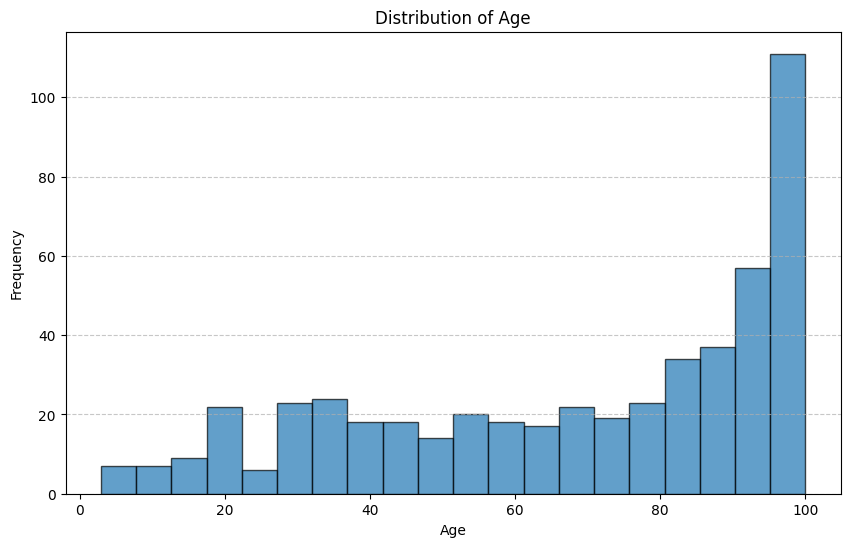

In [19]:
# Task 1: Create a histogram showing the distribution of the "age" column.

import matplotlib.pyplot as plt

df = spark.sql("SELECT * FROM bostonhousing.bos_housing")

age_data = df.select("age").toPandas()

plt.figure(figsize=(10, 6))
plt.hist(age_data['age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
# Task 2: Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River).
percentage_query = """
SELECT
    (SUM(CASE WHEN chas = 1 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS chas_percentage
FROM bostonhousing.bos_housing
"""

percentage_result = spark.sql(percentage_query)
percentage_result.show()

+----------------+
| chas_percentage|
+----------------+
|6.91699604743083|
+----------------+



# Task 5: Correlation Analysis

In [21]:
# Task 1: Calculate the correlation coefficient between "rm" and "medv." Explain the relationship between the average number of rooms and median home value.
from pyspark.sql.functions import corr

correlation = df.stat.corr("rm", "medv")
print(f"Correlation coefficient between 'rm' and 'medv': {correlation}")

Correlation coefficient between 'rm' and 'medv': 0.6953599470715401


In [22]:
# Task 2: Investigate if there is any correlation between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration). Report your findings.
correlation_ptratio_nox = df.stat.corr("ptratio", "nox")
print(f"Correlation coefficient between 'ptratio' and 'nox': {correlation_ptratio_nox}")

Correlation coefficient between 'ptratio' and 'nox': 0.18893267711276893


# Task 6: Advanced Querying

In [23]:
# Task 1: Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").
top_5_neighborhoods_query = """
SELECT *
FROM bostonhousing.bos_housing
ORDER BY medv DESC
LIMIT 5
"""

top_5_neighborhoods = spark.sql(top_5_neighborhoods_query)
top_5_neighborhoods.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [24]:
# Task 2: Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.
# Average age for chas = 1
avg_age_chas_1 = df.filter(df.chas == 1).selectExpr("AVG(age)").first()[0]

# Average age for chas = 0
avg_age_chas_0 = df.filter(df.chas == 0).selectExpr("AVG(age)").first()[0]

print(f"Average property age for neighborhoods with chas = 1: {avg_age_chas_1}")
print(f"Average property age for neighborhoods with chas = 0: {avg_age_chas_0}")


Average property age for neighborhoods with chas = 1: 77.50000000000001
Average property age for neighborhoods with chas = 0: 67.91167728237794


# Task 7: Visualization

In [27]:
# Task 1: Create a Hive view named "property_age_view" that includes the "age" and "medv" columns.
create_view_query = """
CREATE VIEW property_age_view AS
SELECT age, medv
FROM bostonhousing.bos_housing
"""

spark.sql(create_view_query)

property_age_view = spark.sql("SELECT * FROM property_age_view")
property_age_view.show();

+-----+----+
|  age|medv|
+-----+----+
| 65.2|24.0|
| 78.9|21.6|
| 61.1|34.7|
| 45.8|33.4|
| 54.2|36.2|
| 58.7|28.7|
| 66.6|22.9|
| 96.1|27.1|
|100.0|16.5|
| 85.9|18.9|
| 94.3|15.0|
| 82.9|18.9|
| 39.0|21.7|
| 61.8|20.4|
| 84.5|18.2|
| 56.5|19.9|
| 29.3|23.1|
| 81.7|17.5|
| 36.6|20.2|
| 69.5|18.2|
+-----+----+
only showing top 20 rows



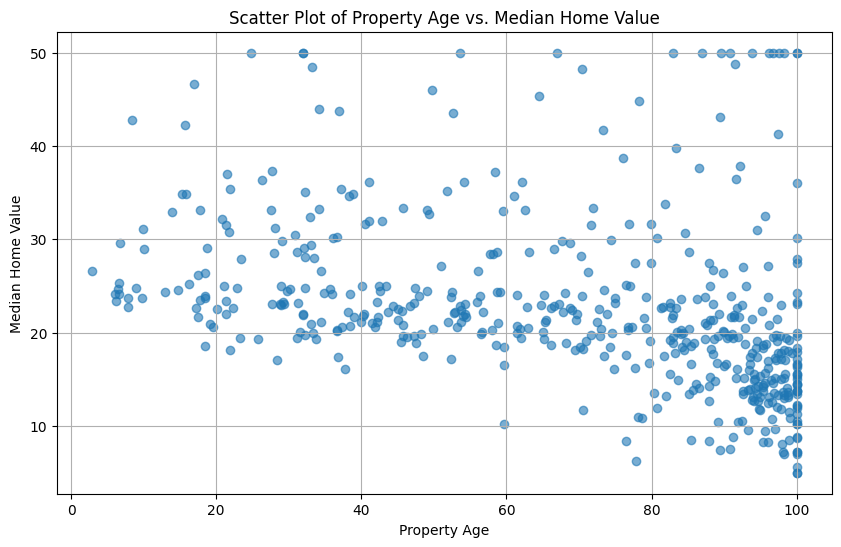

In [28]:
# Task 2: Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
import matplotlib.pyplot as plt

# Collect data
property_age_data = df.select("age", "medv").toPandas()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(property_age_data['age'], property_age_data['medv'], alpha=0.6)
plt.title('Scatter Plot of Property Age vs. Median Home Value')
plt.xlabel('Property Age')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()

# Task 8: Outliers Detection

In [29]:
# Task 1: Write a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).
outliers_query = """
SELECT *
FROM bostonhousing.bos_housing
WHERE crim > 10
"""

# Execute the query
outliers = spark.sql(outliers_query)
outliers.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

In [ ]:
# Task 2: Discuss the significance of detecting outliers in data analysis.

# An outlier is a data point that differs significantly from other data points in a dataset.
# Outliers can be caused by measurement errors, data corruption, or real-world events such as natural disasters.
# Outliers can significantly affect the results of a machine learning model, especially if they are not detected and handled appropriately.

# Outliers can have a significant impact on the accuracy of machine learning models.
# If outliers are not detected and handled appropriately, they can lead to overfitting, underfitting, or biased results.

# Task 9: Hypothesis Testing (20 minutes)

In [ ]:
# Task 1: Formulate a hypothesis about the impact of the "rm" (average number of rooms) on median home value.
# Hypothesis: There is a positive relationship between the average number of rooms ("rm") and the median home value ("medv").
#     H0: There is no linear relationship between the average number of rooms and the median home value.
#     H1: There is a linear relationship between the average number of rooms and the median home value.

In [31]:
# Task 2: Conduct a hypothesis test using HiveQL to determine if there is a statistically significant relationship between these variables.

correlation_rm_medv_query = """
SELECT corr(rm, medv) AS correlation
FROM bostonhousing.bos_housing
"""

# Execute the query
correlation_rm_medv_result = spark.sql(correlation_rm_medv_query)
correlation_rm_medv = correlation_rm_medv_result.first()[0]

print(f"Correlation coefficient between 'rm' and 'medv': {correlation_rm_medv}")


Correlation coefficient between 'rm' and 'medv': 0.6953599470715401


In [32]:
import math

r = correlation_rm_medv
n = df.count()  # Number of data points

t_statistic = r * math.sqrt(n - 2) / math.sqrt(1 - r**2)
print(f"t-statistic: {t_statistic}")


t-statistic: 21.7220335115382


In [ ]:
# Given the high correlation coefficient and the significant t-statistic value.
# it indicates a strong linear relationship between the average number of rooms and the median home value.
# Therefore, you would reject the null hypothesis (H0) and accept the alternative hypothesis (H1),
# concluding that there is indeed a linear relationship between the average number of rooms and the median home value.